In [1]:
# Libraries to load
import pandas as pd
import numpy as np 
from scipy import stats
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


# data visualization packages 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
pd.set_option('max_columns', None)
import pandas_profiling

# SMOTE package to address imbalanced classes 
from imblearn.over_sampling import SMOTE 

from warnings import filterwarnings
filterwarnings('ignore')
np.random.seed(123)

# Plots and Deeper EDA (Training Data Only)

In [2]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 123)

In [3]:
train = pd.read_csv('./data/train_df.csv')

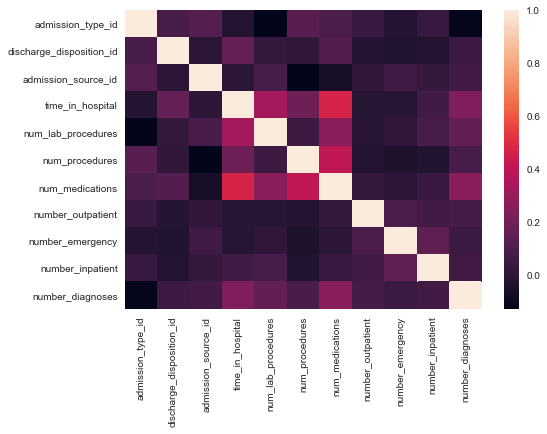

In [4]:
# Looking at correlation - keep an eye out for time_in_hospital vs num_medications
corr = train.corr()
sns.heatmap(corr)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

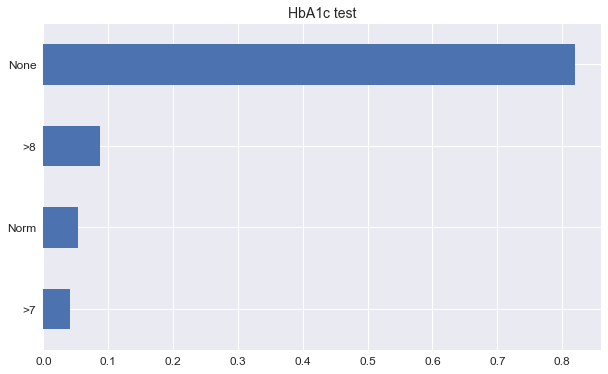

In [5]:
# HbA1c plot
plt.figure(figsize=(10,6))
a1cr_plot = train.A1Cresult.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('HbA1c test',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

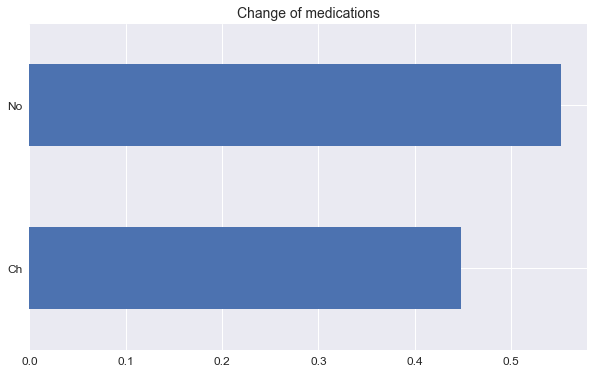

In [6]:
# Med change plot
plt.figure(figsize=(10,6))
change_plot = train.change.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Change of medications',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

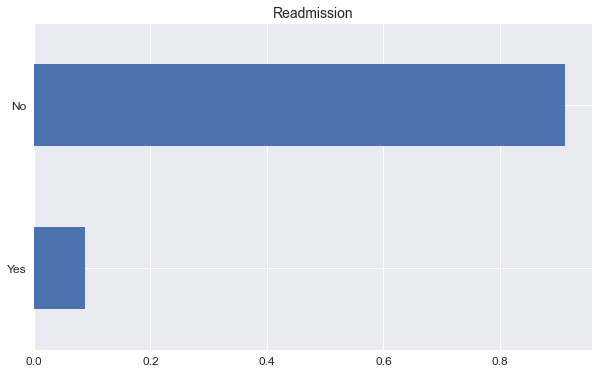

In [7]:
# Readmission plot
plt.figure(figsize=(10,6))
readmission_plot = train.readmitted.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('Readmission',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

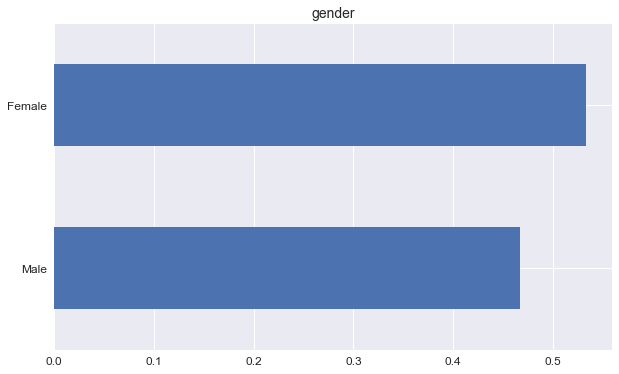

In [8]:
# Gender plot
plt.figure(figsize=(10,6))
gender_plot = train.gender.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('gender',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

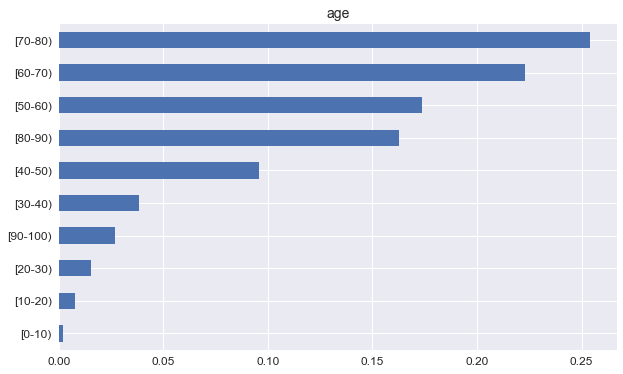

In [9]:
# age plot
plt.figure(figsize=(10,6))
age_plot = train.age.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('age',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

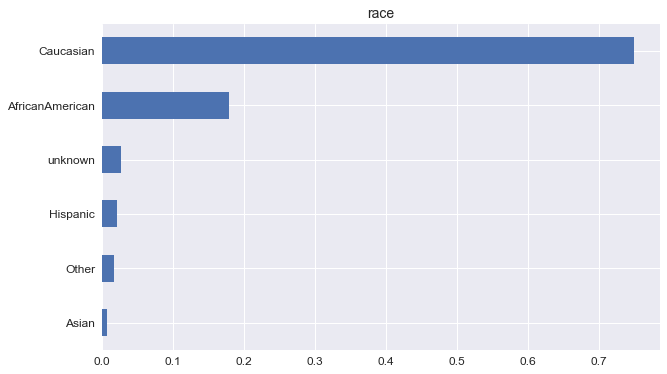

In [10]:
# Race plot
plt.figure(figsize=(10,6))
race_plot = train.race.value_counts().sort_values().apply(lambda x: x/train.race.count()).plot(kind='barh')
plt.title('race',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [11]:
train['max_glu_serum'].replace('>300','>200',inplace=True)
train['A1Cresult'].replace('>8','>7',inplace=True)

# Max Glucose Serum

In [12]:
#Readmission Table 1: Max Glucouse Serum
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count()

race
max_glu_serum readmitted       
>200          No           1232
              Yes           144
None          No          49693
              Yes          4749
Norm          No           1259
              Yes           135

In [13]:
#Percentage
train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count().apply(lambda x: x/train.race.count())

race
max_glu_serum readmitted          
>200          No          0.021534
              Yes         0.002517
None          No          0.868577
              Yes         0.083007
Norm          No          0.022006
              Yes         0.002360

#### Showing Percentage of Max Glucose Serum Readmitted 

In [71]:
#Showing only YES Values
maxglu_percent = train[['max_glu_serum','readmitted', 'race']].groupby(['max_glu_serum','readmitted']).count().apply(lambda x: x/train.race.count())
#maxglu_percent = maxglu_percent.xs('Yes', level=1, drop_level=False)
maxglu_percent = maxglu_percent.reset_index()
maxglu_percent.columns = ['max_glu_serum', 'readmitted', 'Percentage']
maxglu_percent = maxglu_percent.sort_values('Percentage', ascending = False)
maxglu_percent

,max_glu_serum,readmitted,Percentage
2,None,No,0.868577
3,None,Yes,0.083007
4,Norm,No,0.022006
0,>200,No,0.021534
1,>200,Yes,0.002517
5,Norm,Yes,0.002360


Text(0, 0.5, 'Percentage')

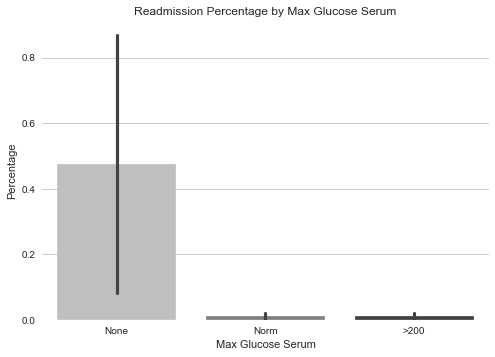

In [72]:
plt.figure()
sns.barplot(x="max_glu_serum", y="Percentage", data=maxglu_percent , ci=95, palette = 'binary')
sns.set_style(style="whitegrid")
plt.title('Readmission Percentage by Max Glucose Serum')
plt.xlabel('Max Glucose Serum')
plt.ylabel('Percentage')

## A1c 

In [17]:
#Readmission Table 2: A1C Result 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count()

race
A1Cresult readmitted       
>7        No           6700
          Yes           603
None      No          42720
          Yes          4170
Norm      No           2764
          Yes           255

In [18]:
#Percentage 
train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count().apply(lambda x: x/train.race.count())

race
A1Cresult readmitted          
>7        No          0.117108
          Yes         0.010540
None      No          0.746696
          Yes         0.072887
Norm      No          0.048312
          Yes         0.004457

#### Showing Percentage of A1C Result Readmitted 

In [43]:
#Showing only YES Values
a1c_percent = train[['A1Cresult','readmitted', 'race']].groupby(['A1Cresult','readmitted']).count().apply(lambda x: x/train.race.count())
#a1c_percent = a1c_percent.xs('Yes', level=1, drop_level=False)
a1c_percent = a1c_percent.reset_index()
a1c_percent.columns = ['A1Cresult', 'readmitted', 'Percentage']
a1c_percent = a1c_percent.sort_values('Percentage', ascending = False)

Text(0, 0.5, 'Percentage')

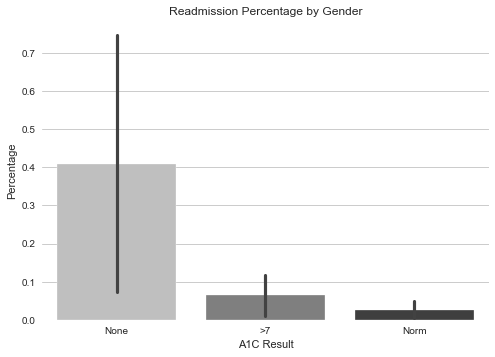

In [44]:
plt.figure()
sns.barplot(x="A1Cresult", y="Percentage", data=a1c_percent , ci=95, palette = 'binary')
sns.set_style(style="whitegrid")
plt.title('Readmission Percentage by Gender')
plt.xlabel('A1C Result')
plt.ylabel('Percentage')

## Gender


In [21]:
#Readmission Table 3: Gender
train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count()

race
gender readmitted       
Female No          27789
       Yes          2697
Male   No          24395
       Yes          2331

In [63]:
#Percentage 
#train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count().apply(lambda x: x/train.race.count()).plot(kind='barh')

#### Showing Percentage of Gender Readmitted

In [23]:
#Show only YES Values
gender_percent = train[['gender','readmitted', 'race']].groupby(['gender','readmitted']).count().apply(lambda x: x/train.race.count())
#gender_percent = gender_percent.xs('Yes', level=1, drop_level=False)
gender_percent = gender_percent.reset_index()
gender_percent.columns = ['gender', 'readmitted', 'Percentage']
gender_percent

,gender,readmitted,Percentage
0,Female,No,0.485720
1,Female,Yes,0.047140
2,Male,No,0.426397
3,Male,Yes,0.040743


Text(0, 0.5, 'Percentage')

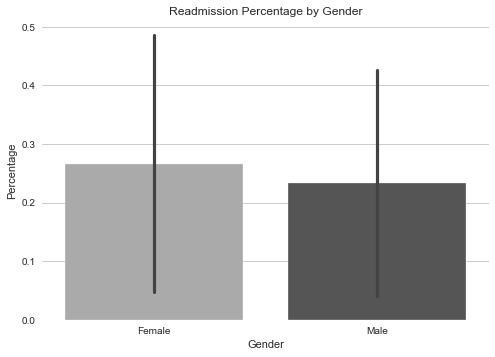

In [24]:
plt.figure()
sns.barplot(x="gender", y="Percentage", data=gender_percent , ci=95, palette = 'binary')
sns.set_style(style="whitegrid")
plt.title('Readmission Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')

## Age


In [ ]:
#Readmission Table 4: Age
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count()

In [ ]:
#Percentage
train[['age','readmitted', 'race']].groupby(['age','readmitted']).count().apply(lambda x: x/train.race.count())

#### Showing Percentage of Age Readmitted 

In [46]:
#Show only YES Values
age_percent = train[['age','readmitted', 'race']].groupby(['age','readmitted']).count().apply(lambda x: x/train.race.count())
#age_percent = age_percent.xs('Yes', level=1, drop_level=False)
age_percent = age_percent.reset_index()
age_percent.columns = ['Age', 'readmitted', 'Percentage']
age_percent

,Age,readmitted,Percentage
0,[0-10),No,0.002167
1,[0-10),Yes,0.000052
2,[10-20),No,0.007271
3,[10-20),Yes,0.000350
4,[20-30),No,0.014298
5,[20-30),Yes,0.001224
6,[30-40),No,0.035674
7,[30-40),Yes,0.002499
8,[40-50),No,0.088810
9,[40-50),Yes,0.007079


Text(0, 0.5, 'Percentage')

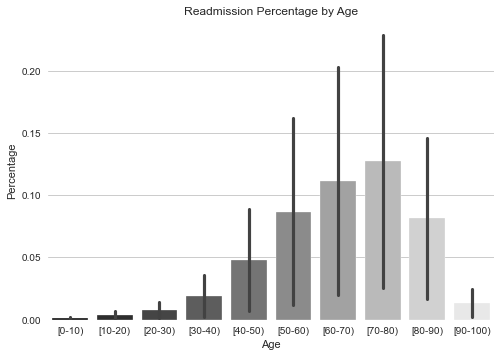

In [27]:
plt.figure()
sns.barplot(x="Age", y="Percentage", data=age_percent , ci=95, palette = 'binary_r')
sns.set_style(style="whitegrid")
plt.title('Readmission Percentage by Age')
plt.xlabel('Age')
plt.ylabel('Percentage')

## Race

In [ ]:
#Readmission Table 5: Race count
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count()

In [ ]:
#Percentage of readmitted by race
train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count().apply(lambda x: x/train.gender.count())

#### Showing Percentage of Race Readmitted 

In [35]:
#Show only YES Values
race_percent = train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count().apply(lambda x: x/train.gender.count())

race_percent = race_percent.reset_index()
race_percent.columns = ['race', 'readmitted', 'Percentage']
race_percent = race_percent.sort_values('Percentage', ascending = False)
race_percent

,race,readmitted,Percentage
4,Caucasian,No,0.680959
0,AfricanAmerican,No,0.164424
5,Caucasian,Yes,0.067713
10,unknown,No,0.025274
6,Hispanic,No,0.019838
8,Other,No,0.015399
1,AfricanAmerican,Yes,0.014892
2,Asian,No,0.006222
11,unknown,Yes,0.001958
7,Hispanic,Yes,0.001713


In [62]:
race_percentxs = train[['race','readmitted', 'gender']].groupby(['race','readmitted']).count().apply(lambda x: x/train.gender.count())
race_percentxs = race_percentxs.xs('Yes', level=1, drop_level=False).reset_index()
race_percentxs.columns = ['Race', 'Readmitted', 'Percentage']
race_percentxs.style.hide_index()

Race,Readmitted,Percentage
AfricanAmerican,Yes,0.014892
Asian,Yes,0.000524
Caucasian,Yes,0.067713
Hispanic,Yes,0.001713
Other,Yes,0.001084
unknown,Yes,0.001958


Text(0, 0.5, 'Percentage')

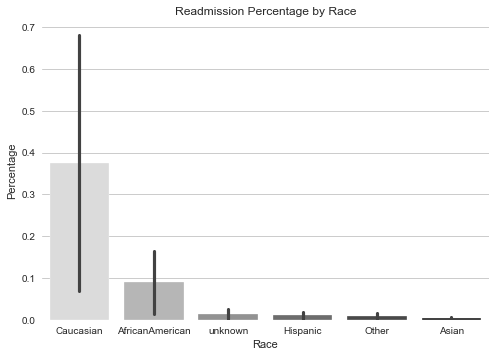

In [52]:
plt.figure()
sns.barplot(x="race", y="Percentage", data=race_percent, ci=95, palette = 'binary')
sns.set_style(style="whitegrid")
plt.title('Readmission Percentage by Race')
plt.xlabel('Race')
plt.ylabel('Percentage')

In [ ]:
#train.profile_report()